In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [335]:
df=pd.read_csv('train_ctrUa4K.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [336]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [338]:
df.shape

(614, 13)

In [339]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [340]:
df.isnull().sum()*100/614

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [341]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [342]:
df.dropna(subset=['Credit_History','Self_Employed','LoanAmount','Loan_Amount_Term'],inplace=True)

In [343]:
df.isnull().sum()

Loan_ID               0
Gender               12
Married               2
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [344]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    430
180.0     38
480.0     14
300.0     10
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: count, dtype: int64

In [345]:
df['Loan_Status'].value_counts()

Loan_Status
Y    345
N    159
Name: count, dtype: int64

In [346]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [347]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [348]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [349]:
df.shape

(504, 13)

In [350]:
# df['Loan_Amount_Term_Year'] = df['Loan_Amount_Term']/12

In [351]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [352]:
from sklearn.preprocessing import LabelEncoder

In [353]:
le= LabelEncoder()

In [354]:
df['Gender']= le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [355]:
df= pd.get_dummies(df, columns = ['Education','Dependents','Property_Area'],dtype=float)
df

,Loan_ID,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Education_Graduate,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,N,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,LP001005,1,1,1,3000,0.0,66.0,360.0,1.0,Y,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,LP001006,1,1,0,2583,2358.0,120.0,360.0,1.0,Y,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,LP001008,1,0,0,6000,0.0,141.0,360.0,1.0,Y,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,LP001011,1,1,1,5417,4196.0,267.0,360.0,1.0,Y,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,2900,0.0,71.0,360.0,1.0,Y,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
610,LP002979,1,1,0,4106,0.0,40.0,180.0,1.0,Y,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
611,LP002983,1,1,0,8072,240.0,253.0,360.0,1.0,Y,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
612,LP002984,1,1,0,7583,0.0,187.0,360.0,1.0,Y,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Random Forest Classification

In [356]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [357]:
X=df.drop(['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']

<Axes: >

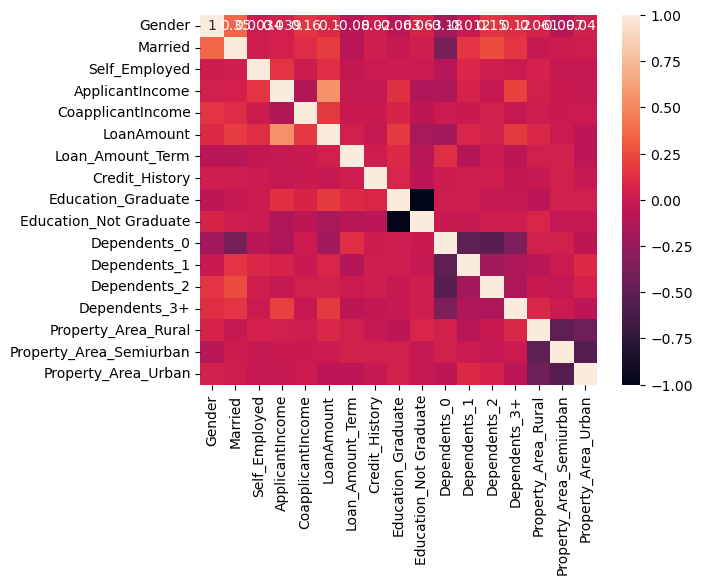

In [358]:
sns.heatmap(X.corr(),annot = True)

In [359]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [360]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=10)
X_res, y_res = smote.fit_resample(X, y)

In [361]:
randomforest = RandomForestClassifier(random_state=10,min_samples_leaf=4,n_estimators = 200,max_depth = 3,n_jobs = -1)
randomforest.fit(X_res, y_res)

RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_estimators=200,
                       n_jobs=-1, random_state=10)

In [362]:
y_pred = randomforest.predict(X)
print("Classification Report:")
print(classification_report(y, y_pred))  
print(f'Accuracy: {accuracy_score(y, y_pred):.2f}')

Classification Report:
              precision    recall  f1-score   support

           N       0.86      0.47      0.61       159
           Y       0.80      0.97      0.87       345

    accuracy                           0.81       504
   macro avg       0.83      0.72      0.74       504
weighted avg       0.82      0.81      0.79       504

Accuracy: 0.81


In [363]:
X

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1,0,4583,1508.0,128.0,360.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,1,1,3000,0.0,66.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,0,2583,2358.0,120.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,0,6000,0.0,141.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1,1,1,5417,4196.0,267.0,360.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
610,1,1,0,4106,0.0,40.0,180.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
611,1,1,0,8072,240.0,253.0,360.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
612,1,1,0,7583,0.0,187.0,360.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [364]:
t=pd.read_csv('test_lAUu6dG.csv')
t

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [365]:
t.shape

(367, 12)

In [368]:
t.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [373]:
t['Gender'].fillna(t['Gender'].mode()[0],inplace=True)
t['Dependents'].fillna(t['Dependents'].mode()[0],inplace=True)
t['Self_Employed'].fillna(t['Self_Employed'].mode()[0],inplace=True)

In [375]:
t['LoanAmount'].fillna(t['LoanAmount'].mean(),inplace=True)
t['Loan_Amount_Term'].fillna(t['Loan_Amount_Term'].median(),inplace=True)
t['Credit_History'].fillna(t['Credit_History'].mode()[0],inplace=True)

In [376]:
t.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [377]:
Loan_ID=t['Loan_ID']

In [378]:
t=t.drop(columns='Loan_ID')

In [379]:
from sklearn.preprocessing import LabelEncoder

In [380]:
led=LabelEncoder()

In [381]:
t['Gender']= led.fit_transform(t['Gender'])
t['Married']=led.fit_transform(t['Married'])
t['Self_Employed']=led.fit_transform(t['Self_Employed'])

In [382]:
t= pd.get_dummies(t, columns = ['Education','Dependents','Property_Area'],dtype=float)
t

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,5720,0,110.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0,3076,1500,126.0,360.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,1,0,5000,1800,208.0,360.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1,0,2340,2546,100.0,360.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,0,0,3276,0,78.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,1,4009,1777,113.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
363,1,1,0,4158,709,115.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
364,1,0,0,3250,1993,126.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
365,1,1,0,5000,2393,158.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [383]:
# t=t.drop(columns='Loan_Amount_Term')

In [384]:
y_pred_t = randomforest.predict(t)
y_pred_t

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [385]:
df_final = pd.DataFrame()

In [386]:
df_final['Loan_ID'] = Loan_ID
df_final['Loan_Status'] = y_pred_t
df_final

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [387]:
df_final.to_csv(r'Submission.csv')